<a href="https://colab.research.google.com/github/Suyash2711/HealthCare_LOS_Prediction/blob/main/HealthcareLOSPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import sys
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train=pd.read_csv('/content/train_data.csv')
test=pd.read_csv('/content/test_data.csv')
sub=pd.read_csv('/content/sample_sub.csv')

In [4]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [7]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [8]:
train['count']=1

In [9]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,count
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1


In [10]:
train.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [11]:
train.Age.value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [12]:
train['Severity of Illness'].describe()

count       318438
unique           3
top       Moderate
freq        175843
Name: Severity of Illness, dtype: object

In [13]:
train['Hospital_type_code'].describe()

count     318438
unique         7
top            a
freq      143425
Name: Hospital_type_code, dtype: object

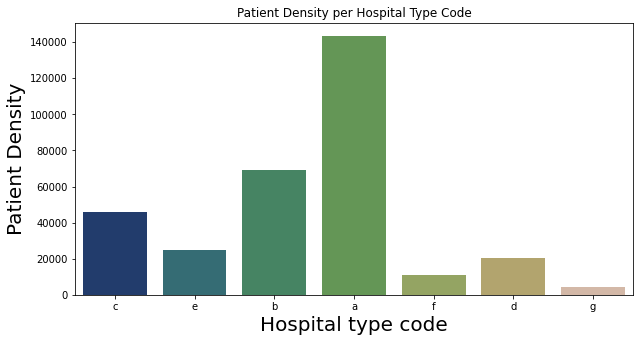

In [14]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Hospital_type_code', data = train, palette = 'gist_earth')
plt.xlabel('Hospital type code', size = 20)
plt.ylabel('Patient Density', size = 20)
plt.title('Patient Density per Hospital Type Code')
plt.show()

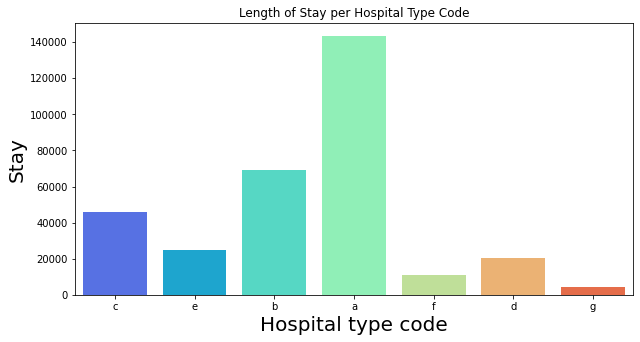

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Hospital_type_code', data = train, palette = 'rainbow')
plt.xlabel('Hospital type code', size = 20)
plt.ylabel('Stay', size = 20)
plt.title('Length of Stay per Hospital Type Code')
plt.show()

In [16]:
train.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [17]:
Stay_index = train.Stay.value_counts().index[:11]
Stay_index

Index(['21-30', '11-20', '31-40', '51-60', '0-10', '41-50', '71-80',
       'More than 100 Days', '81-90', '91-100', '61-70'],
      dtype='object')

In [18]:
Hospital_type_codeindex= train.Hospital_type_code.value_counts().index[:7]
Hospital_type_codeindex

Index(['a', 'b', 'c', 'e', 'd', 'f', 'g'], dtype='object')

In [19]:
subdata = train[(train.Hospital_type_code.isin(Hospital_type_codeindex)) & (train.Stay.isin(Stay_index))]

In [20]:
cf = pd.crosstab(columns=subdata.Stay, index = subdata.Hospital_type_code) 
cf

Stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
Hospital_type_code,,,,,,,,,,,
a,10559,39807,40286,23974,4111,14617,924,3722,1890,962,2573
b,5145,13933,19541,12385,3893,6909,917,2608,1026,783,1806
c,3588,10318,12526,8222,1872,5176,430,1611,725,439,1021
d,1314,4423,5527,3706,760,2713,186,761,421,180,398
e,1805,6644,6524,4060,764,2832,197,824,395,218,507
f,1023,2332,1897,2093,204,1960,44,482,254,138,276
g,170,682,1190,719,139,811,46,246,127,45,102


<Figure size 432x288 with 0 Axes>

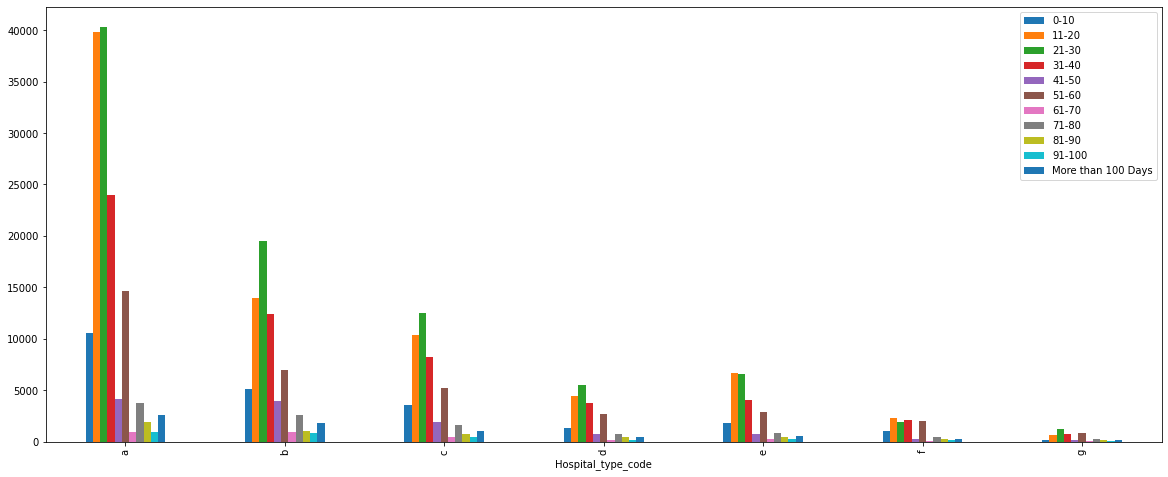

In [21]:
plt.figure()
cf = pd.crosstab(columns=subdata.Stay, index = subdata.Hospital_type_code) 
cf.plot.bar(figsize = (20,8), )
plt.legend(loc = 'best')
plt.show()

In [22]:
train.Hospital_region_code.describe()

count     318438
unique         3
top            X
freq      133336
Name: Hospital_region_code, dtype: object

In [23]:
train.Hospital_region_code.value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [24]:
import plotly.express as px
fig = px.sunburst(train, path=['Hospital_region_code', 'Hospital_type_code'])
fig.update_layout(title='Categorizing Hospital Type according to Region')
fig.show()

In [25]:
train


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,count
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20,1
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40,1
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20,1
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20,1


In [26]:
train.Ward_Type.value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [27]:
train.Ward_Facility_Code.value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [28]:
train_new=train.drop(['case_id','Hospital_code','City_Code_Hospital','Hospital_region_code','City_Code_Patient','Visitors with Patient','Admission_Deposit','Ward_Facility_Code','Ward_Type'],axis=1)

In [29]:
train_new

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Stay,count
0,c,3,radiotherapy,2.0,31397,Emergency,Extreme,51-60,0-10,1
1,c,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50,1
2,e,2,anesthesia,2.0,31397,Trauma,Extreme,51-60,31-40,1
3,b,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50,1
4,b,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50,1
...,...,...,...,...,...,...,...,...,...,...
318433,a,3,radiotherapy,4.0,86499,Emergency,Moderate,41-50,11-20,1
318434,a,2,anesthesia,4.0,325,Urgent,Moderate,81-90,31-40,1
318435,a,3,gynecology,4.0,125235,Emergency,Minor,71-80,11-20,1
318436,b,3,anesthesia,3.0,91081,Trauma,Minor,11-20,11-20,1


In [30]:
train_new.drop(train_new.index[4])

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Bed Grade,patientid,Type of Admission,Severity of Illness,Age,Stay,count
0,c,3,radiotherapy,2.0,31397,Emergency,Extreme,51-60,0-10,1
1,c,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50,1
2,e,2,anesthesia,2.0,31397,Trauma,Extreme,51-60,31-40,1
3,b,2,radiotherapy,2.0,31397,Trauma,Extreme,51-60,41-50,1
5,a,2,anesthesia,2.0,31397,Trauma,Extreme,51-60,11-20,1
...,...,...,...,...,...,...,...,...,...,...
318433,a,3,radiotherapy,4.0,86499,Emergency,Moderate,41-50,11-20,1
318434,a,2,anesthesia,4.0,325,Urgent,Moderate,81-90,31-40,1
318435,a,3,gynecology,4.0,125235,Emergency,Minor,71-80,11-20,1
318436,b,3,anesthesia,3.0,91081,Trauma,Minor,11-20,11-20,1


In [31]:
train_new=train_new.drop(['Hospital_type_code','patientid'],axis=1)

In [32]:
train_new

,Available Extra Rooms in Hospital,Department,Bed Grade,Type of Admission,Severity of Illness,Age,Stay,count
0,3,radiotherapy,2.0,Emergency,Extreme,51-60,0-10,1
1,2,radiotherapy,2.0,Trauma,Extreme,51-60,41-50,1
2,2,anesthesia,2.0,Trauma,Extreme,51-60,31-40,1
3,2,radiotherapy,2.0,Trauma,Extreme,51-60,41-50,1
4,2,radiotherapy,2.0,Trauma,Extreme,51-60,41-50,1
...,...,...,...,...,...,...,...,...
318433,3,radiotherapy,4.0,Emergency,Moderate,41-50,11-20,1
318434,2,anesthesia,4.0,Urgent,Moderate,81-90,31-40,1
318435,3,gynecology,4.0,Emergency,Minor,71-80,11-20,1
318436,3,anesthesia,3.0,Trauma,Minor,11-20,11-20,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



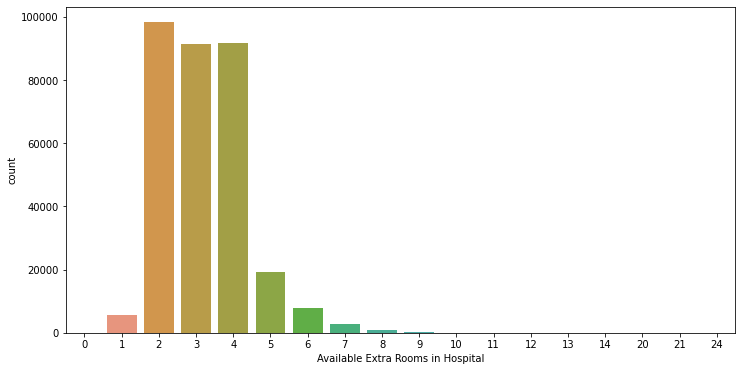

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(train_new['Available Extra Rooms in Hospital']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



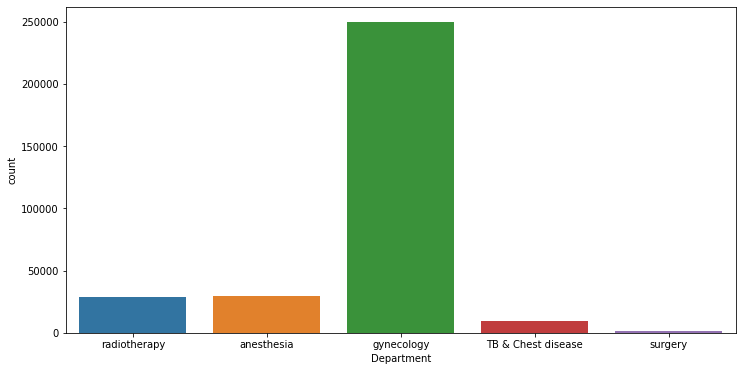

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(train.Department) 